# Data Visualization

In order to visualize the data, the following graphs were created:
1. Histogram of Sales
2. Boxplot of Sales
3. Histograms of numeric features
4. Scatterplot to check the relationship between the numeric features.
5. Boxplot of categorical features vs Sales.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.style.use("seaborn")

/home/yeison/anaconda3/envs/data-science1/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Setting the Appearance of Charts

In [2]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

colors = ["#0466C8","#0353A4","#023E7D","#002855",
          "#001845","#001233","#33415C","#5C677D",
          "#7D8597","#979DAC","#CAF0F8","#ADE8F4",
          "#90E0EF","#48CAEA","#00B4D8","#0096C7",
          "#0077B6"]

font_title = {"size":20, "color":"#114B5F"}
font_label = {'color':  '#114B5F','size': 16}

In [2]:
df = pd.read_csv("food_sales_forecast_cleaned.csv")
df.head()

,Outlet_Location_Type,Outlet_Type,Outlet_Identifier,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Item_Outlet_Sales
0,Tier 1,Grocery Store,OUT019,DRA24,Regular,0.069909,Soft Drinks,163.2868,Small,491.3604
1,Tier 1,Grocery Store,OUT019,DRA59,Regular,0.223985,Soft Drinks,186.2924,Small,555.2772
2,Tier 1,Grocery Store,OUT019,DRC25,Low Fat,0.079440,Soft Drinks,86.7882,Small,85.8882
3,Tier 1,Grocery Store,OUT019,DRD15,Low Fat,0.099442,Dairy,233.1642,Small,697.0926
4,Tier 1,Grocery Store,OUT019,DRD25,Low Fat,0.138270,Soft Drinks,111.6860,Small,452.7440


### Summary Statistics
Let's start our analysis of the data by examining the dataframe using the method describe.

In [20]:
df.describe().round(2)

,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.00,8523.00,8523.00
mean,0.07,140.99,2181.29
std,0.05,62.28,1706.50
min,0.00,31.29,33.29
25%,0.03,93.83,834.25
50%,0.05,143.01,1794.33
75%,0.09,185.64,3101.30
max,0.33,266.89,13086.96


From this we can observe that:
- The mean in the Sales column is 2181.29, the standard deviation is comparatively large that means that there is a lot of variance in the sales.
- There is a total of 8523 observations.
- The minimum sales is 33.29 dollars.
- The maximum of sales reported was 13089.96 dollars.

## Sales Distribution

Let's create a histogram and a boxplot to get a clear idea of the distribution of sales.

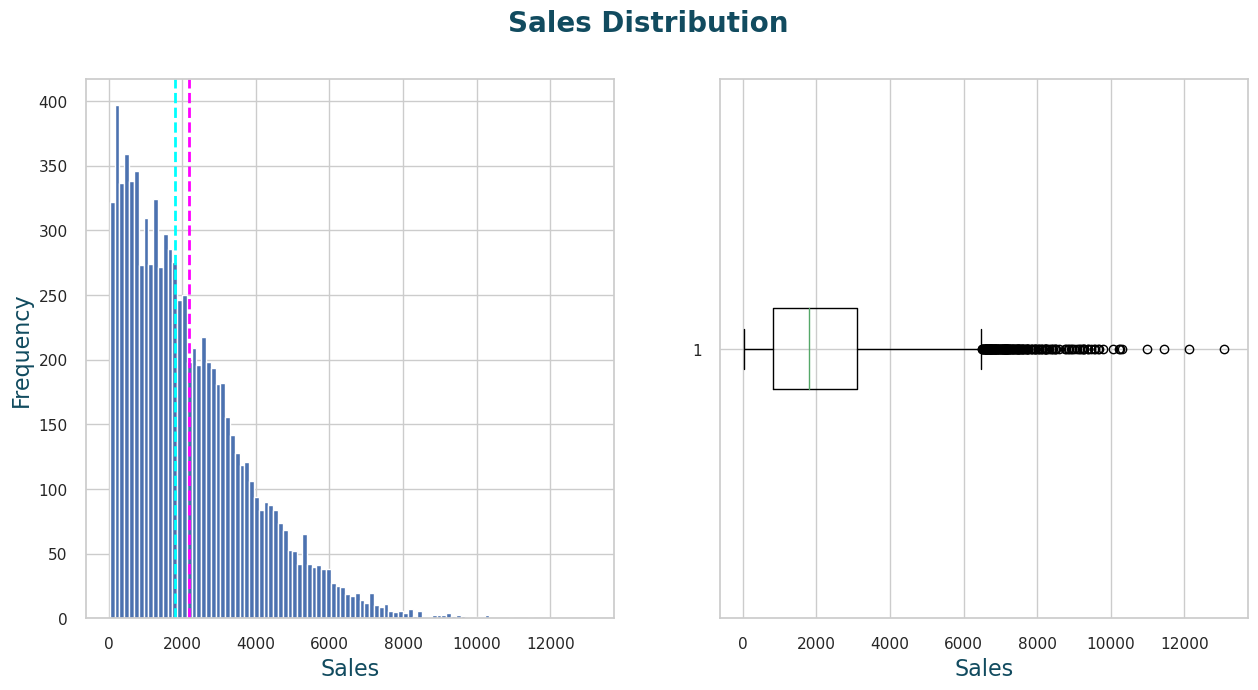

In [21]:
# get the column of interest
label = df['Item_Outlet_Sales']

# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(1, 2, figsize = (15,7), dpi=100)

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency', fontdict=font_label)

# Add lines for the mean and median
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2) # mean
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2) # median
ax[0].set_xlabel('Sales', fontdict=font_label)
# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Sales', fontdict=font_label)

# Add a title to the Figure
fig.suptitle('Sales Distribution', fontsize = 20, color="#114B5F", weight ='bold')

# Show the figure
plt.show()

The mean (and median) sales is closer to the low end of that range, with most of the data between 0 and around 6500 dollars. The few values above this are shown in the box plot as small circles, indicating that they are outliers.

### Relationship Between Numeric Features and Distributions.

 Now, let's look for relationships between the features and the sales label we want to be able to predict.

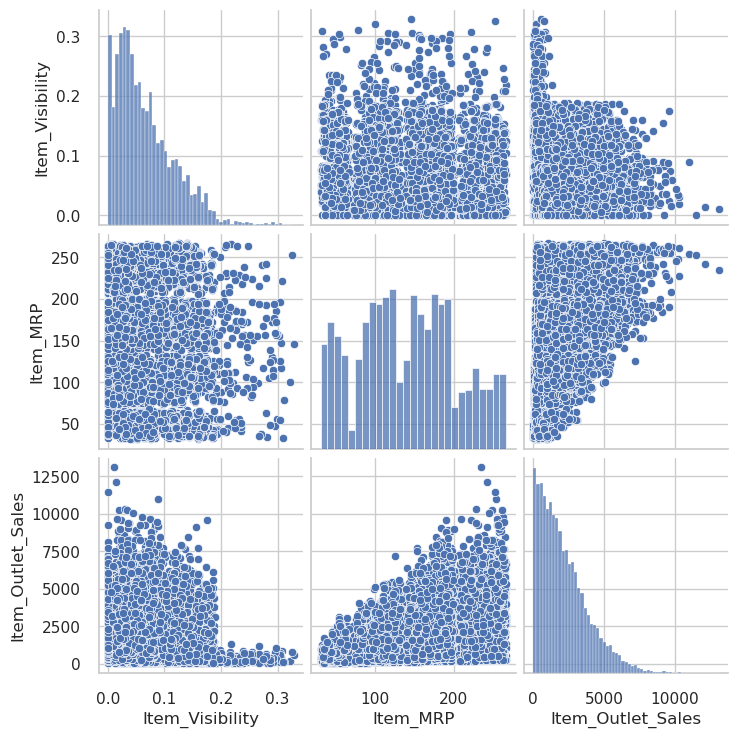

In [22]:
sns.pairplot(df)

Observations:
1. The **distribution** of the studied variables is **not normal**, it is **skewed to the right**.
2. The **majority of the products** have a **price between 100 and 200**.
3. The **majority of the outlets** present **sales under 2500 dollars**.
4. The **visibility** of the products is not normal is **under the 20%** of the total display area of all products in a store.
5. The majority of the products have a visibility between 0 and 10%.
6. There is no a evident correlation between variables.

Let's compare the categorical features to the label:

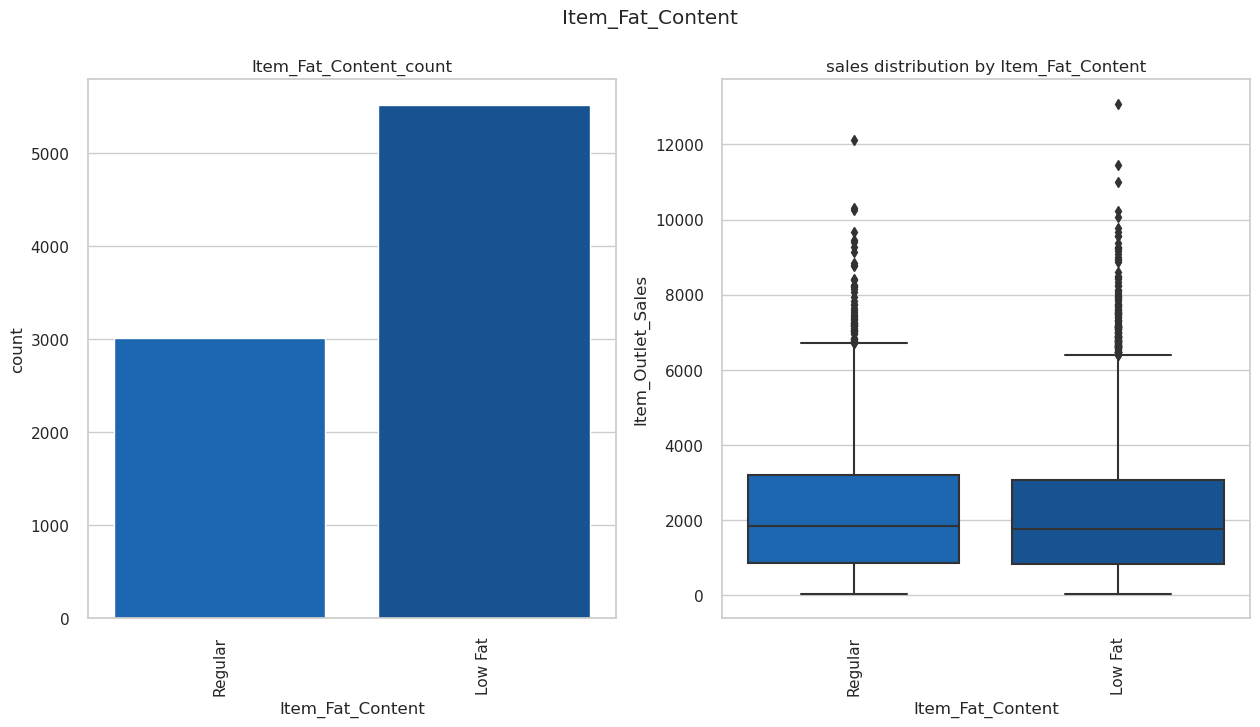

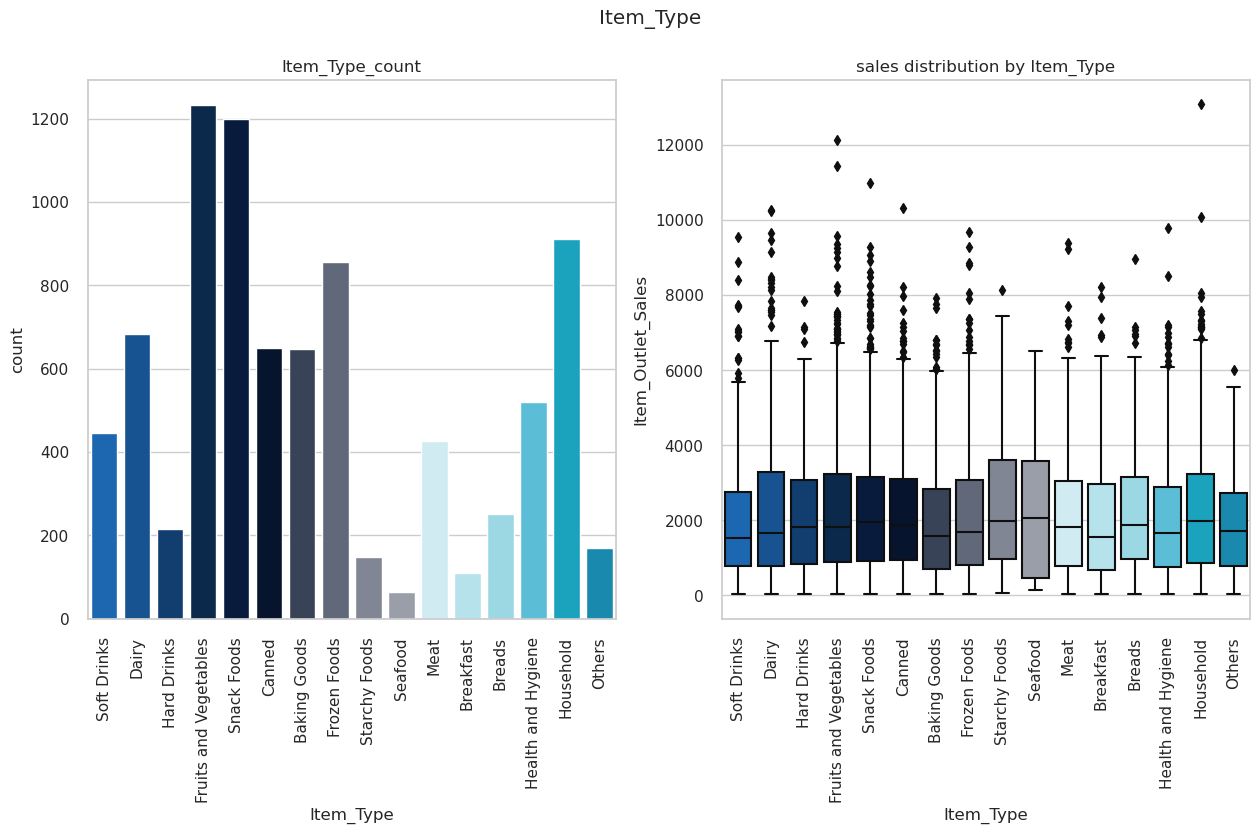

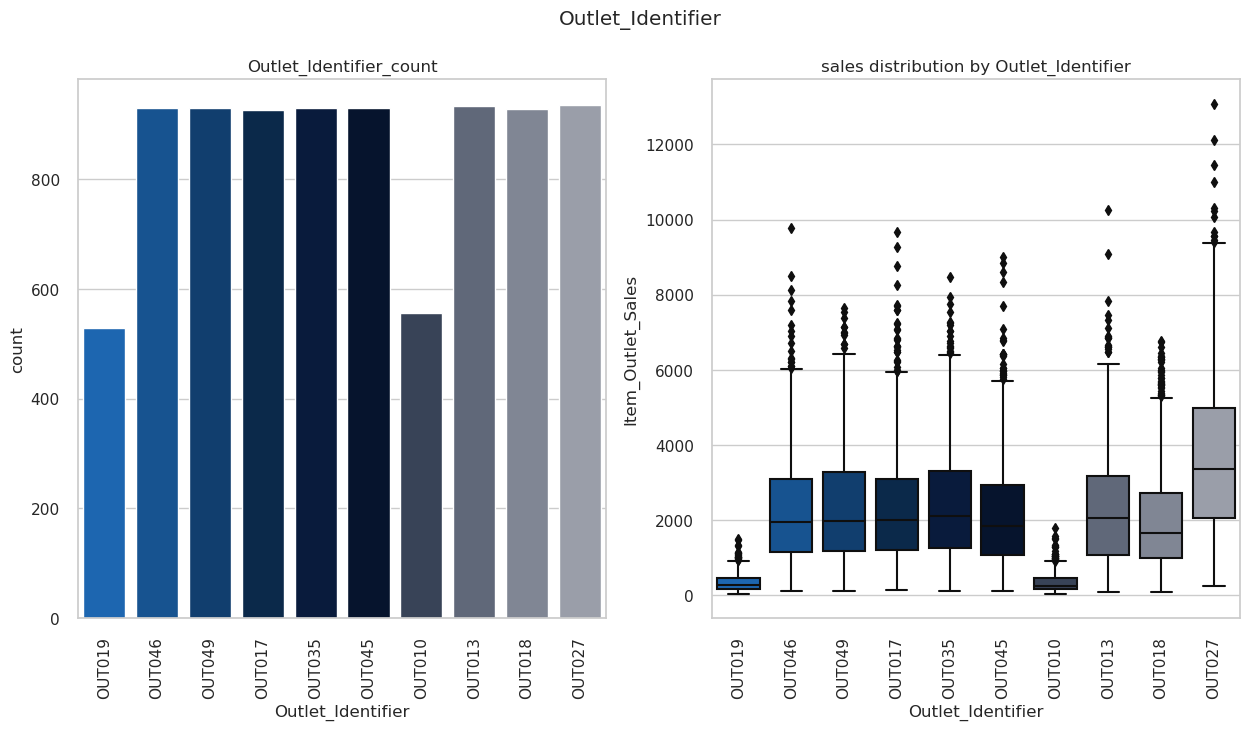

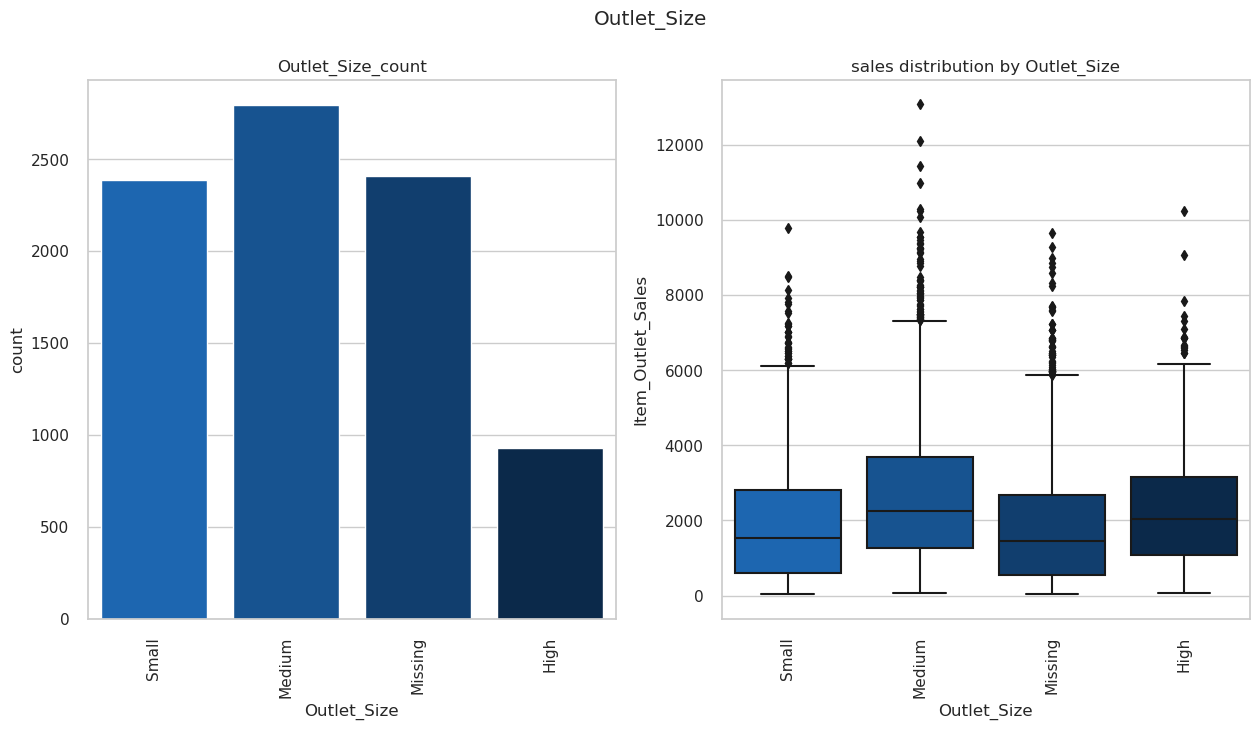

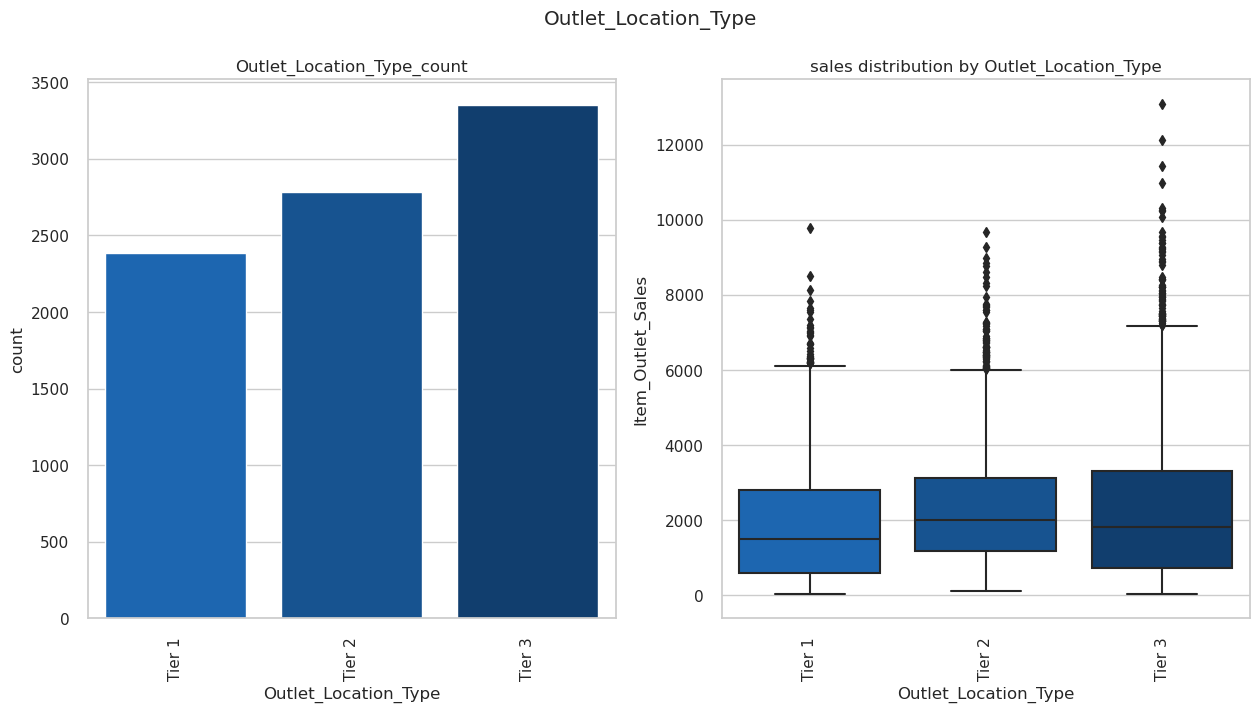

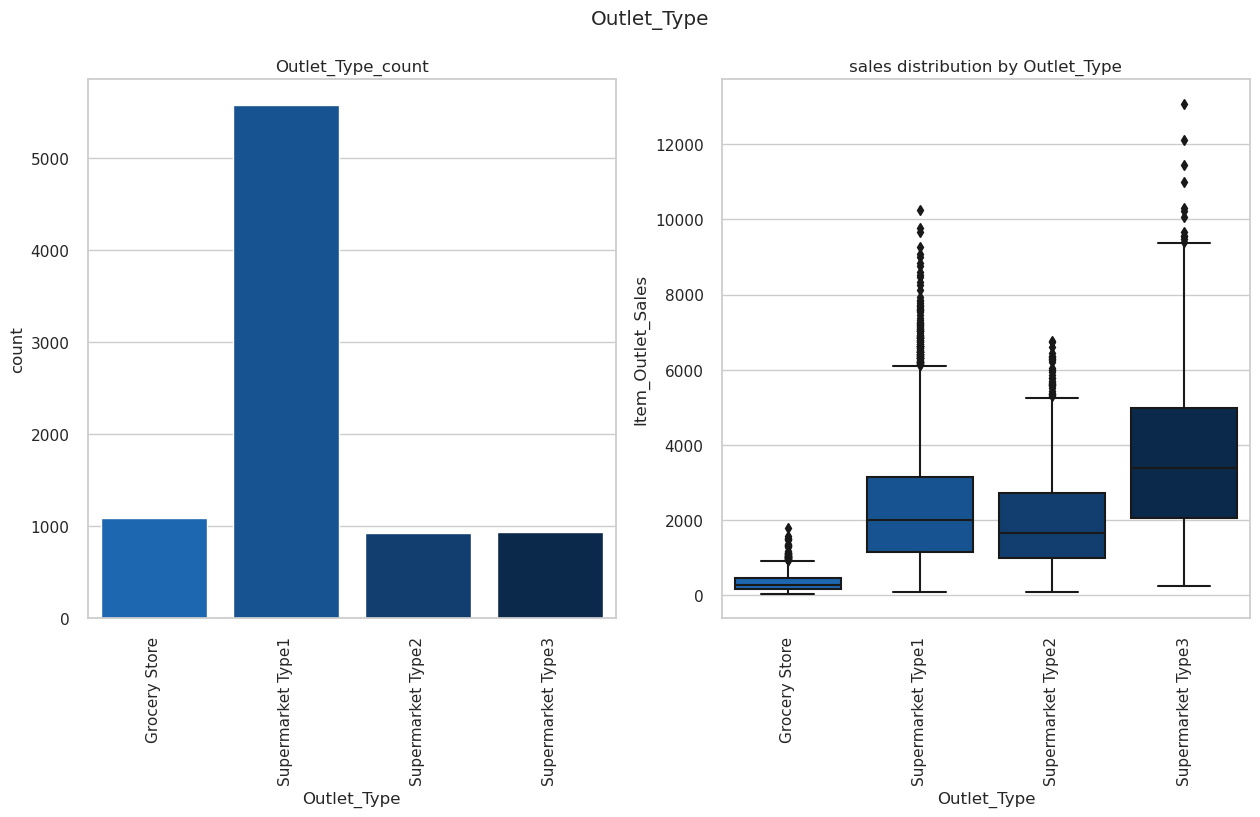

In [23]:
# ['#456990', '#114b5f', '#9d69a3', '#7a3b69','#9a879d',
# '#61707d', '#499167', '#5fdd9d', '#76f7bf', '#91f9e5',
# '#456990','#451770','#456990', '#114b5f', '#9d69a3', '#7a3b69']
for col in cat_features[1:]:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
    dic = dict()
    count = 0
    for categorie in df[col].unique():
        dic[categorie] = colors[count]
        count += 1
    sns.countplot(
        ax= ax1,
        data=df,
        x=col,
        palette=dic
     )
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
    ax1.set_title(col + "_count")
    sns.boxplot(
        ax = ax2,
        data=df,
        x=col,
        y='Item_Outlet_Sales',
        palette=dic,
    )
    fig.suptitle(col)
    plt.xticks(rotation=90)
    ax2.set_title("sales distribution by " + col)

Observations:
1. Regarding the fat content, it can be said that product with low fat content are the best seller whit a 65% of sales. **But the difference in incomes by sales between products whit low or regular fat content is not significant**.
2. **The majority of sales is represented by the products of type "Fruits and Vegetables" and "Snack Foods"**. Whereas the products that generate most income are of the type "Seafood" and "Starchy Foods". 
3. Regarding the categorization by type of Item it is evident that **the sales of the product is quite variable, but the income is mostly uniform**.
4. The majority of **sales are reported from the stores type "Supermarket Type1" and "Grocery Store"**. Whereas **the stores that generate most income are of the type "Supermarket Type3"**.
5. The majority of the stores are located in the city type **"Tier 3" and "Tier 2"** and is this location **type that generates more income**.
6. The majority of the stores are small and medium size, and the **stores with medium and high size generate more income**.
7. **The outlet OUT027 is the one that generates more income**, with a noticeable difference with the other outlets.

## Prices Distributions

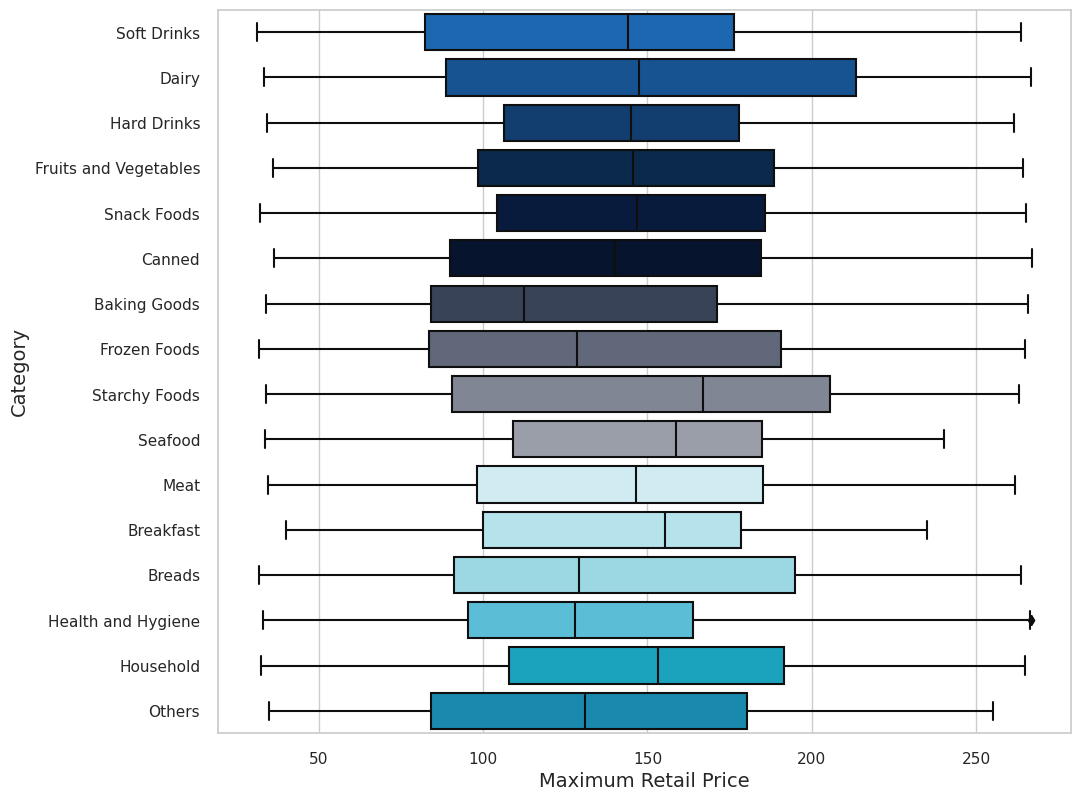

In [24]:
sns.boxplot(x='Item_MRP', y='Item_Type', data=df, palette=colors)
plt.ylabel("Category", fontsize=14)
plt.xlabel("Maximum Retail Price", fontsize=14)
plt.show()

### Bar Chart of Items Type vs Sales
In order to identify the products that generate more sales and the products that generate less sales, the following bar chart was created.

###  Sales by Location and Outlet Type
In order to identify the **percentage of sales in each type of store and the percentage of sales in each type of city**, the following pie charts were created:
1. Bar chart of the columns "Outlet_Type" vs "Sales", grouped by location, this to identify the percentage of sales in each type of store in each type of city.

<h4 id="sales_by_outlet_type_and_location"> Bar Chart of Outlet Type vs Sales, Grouped by Location </h4>

In [25]:
sales_by_location_and_outlet_type =df.groupby(["Outlet_Location_Type", "Outlet_Type"])["Item_Outlet_Sales"].sum()
sales_by_location_and_outlet_type

Outlet_Location_Type  Outlet_Type      
Tier 1                Grocery Store        1.796941e+05
                      Supermarket Type1    4.302365e+06
Tier 2                Supermarket Type1    6.472314e+06
Tier 3                Grocery Store        1.883402e+05
                      Supermarket Type1    2.142664e+06
                      Supermarket Type2    1.851823e+06
                      Supermarket Type3    3.453926e+06
Name: Item_Outlet_Sales, dtype: float64

In [26]:
data_by_location = pd.DataFrame(sales_by_location_and_outlet_type).reset_index()

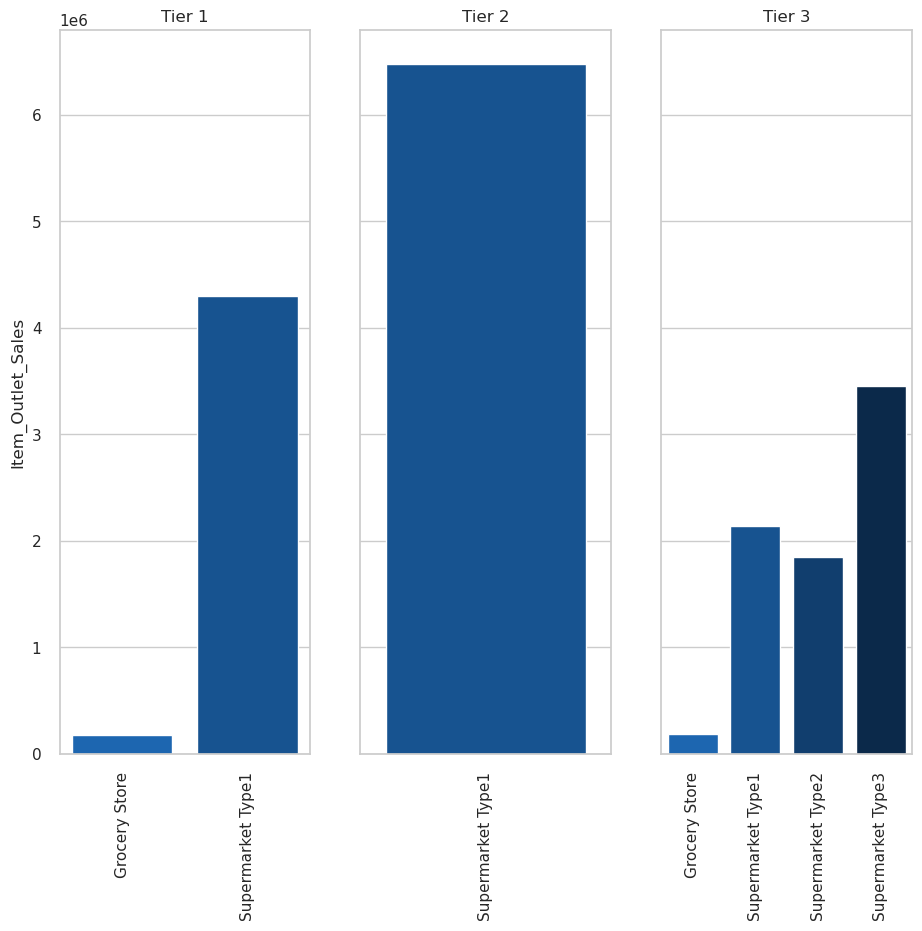

In [27]:
locations = np.array(df["Outlet_Location_Type"].unique()) 
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, sharey=True) # create 1x3 grid of axis subplots with shared y axis
axes = [ax1 ,ax2, ax3]
for n in range(len(axes)):
    values = sales_by_location_and_outlet_type[locations[n]] # get the values (sales) for each location
    (
        sns.
        barplot(data=data_by_location[data_by_location["Outlet_Location_Type"]==locations[n]],
                x="Outlet_Type",
                y="Item_Outlet_Sales",
                ax=axes[n],
                palette=dic
               )
    )
    axes[n].tick_params( axis= "x", labelrotation=90)
    axes[n].set_title(locations[n])
    axes[n].set(xlabel=None)
    if n > 0:
        axes[n].set(ylabel=None) 
        

Observations:
1. The type of store that generates the most sales is the Supermarket Type 1.
2. The type of store that generates the least sales is the Grocery Store.
3. The type of city that generates the most sales is Tier 3.
4. The type of city that generates the least sales is Tier 2.

### Proportion of sales by location and item type

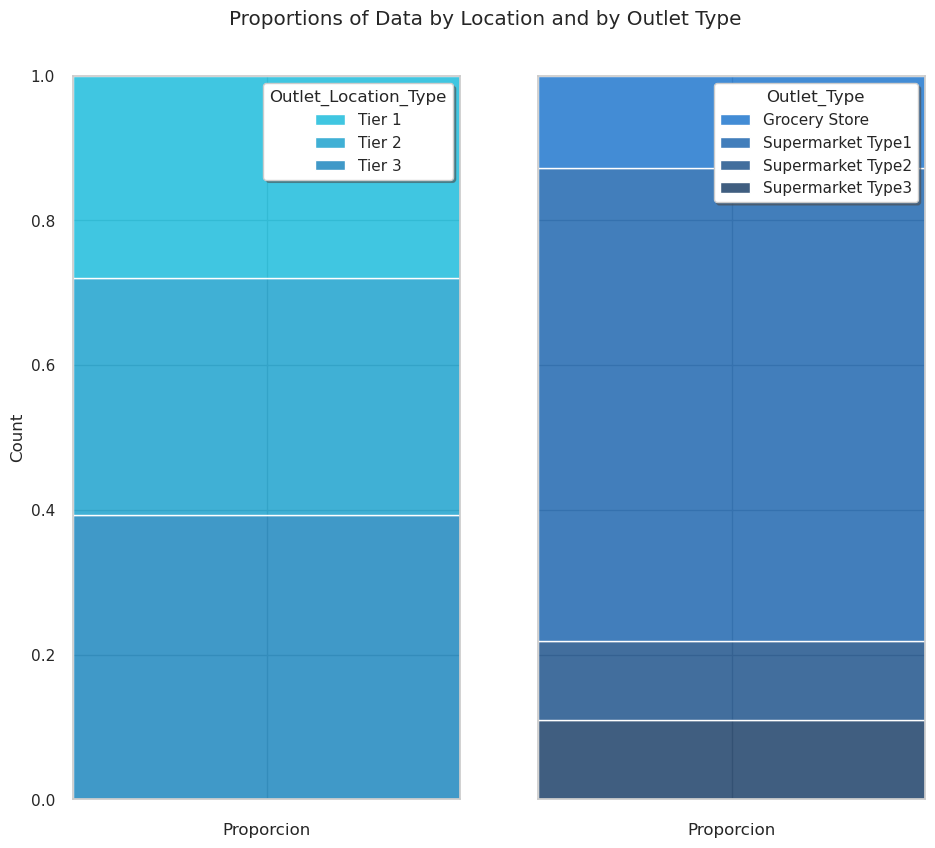

In [28]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, sharey=True) # create 1x2 grid of axis subplots
axes = [ax1 ,ax2]
(
    df
    .assign(Proporcion="")
    .pipe(
        lambda d:(
            sns.histplot(
                ax = ax1,
                data=d,
                x="Proporcion",
                hue="Outlet_Location_Type",
                multiple="fill",
                palette=[ '#00B4D8','#0096C7','#0077B6']
            )
        )
    )
)
ax = (
    df
    .assign(Proporcion="")
    .pipe(
        lambda d:(
            sns.histplot(
                ax=ax2,
                data=d,
                x="Proporcion",
                hue="Outlet_Type",
                multiple="fill",
                palette=dic,
        )
        )
    )
)
# to change the legends location
#plt.show()
sns.move_legend(ax1, "upper right", frameon=True, framealpha=1, shadow=True)
sns.move_legend(ax2, "upper right",frameon=True, framealpha=1, shadow=True) #bbox_to_anchor=(0.5, 1.08)
_ = fig.suptitle("Proportions of Data by Location and by Outlet Type", y= 0.95)
#plt.legend()

Observations:
1. The location type **Tier 3 has highest percentage of sales**.
2. The outlet type **Supermarket Type 1 has the highest sales**.
3. The outlet type **Supermarket Type 3 has the highest sales in Tier 3**.
4. The outlet type **Grocery Store has the lowest sales**.
5. The outlet type **Supermarket Type 1 has the highest sales in Tier 1 and Tier 2**. (representing the highest percentage of the total sales categorized by outlet type).
